# Eroding an Image

In [1]:
import cv2

import numpy as np

In [2]:
# image source : https://www.planetware.com/world/top-cities-in-the-world-to-visit-eng-1-39.htm

image = cv2.imread("image1.jpg") 

In [3]:
# Creating kernel
kernel = np.ones((5, 5), np.uint8)
  
# Using cv2.erode() method 
image_erode = cv2.erode(image, kernel)

In [4]:
filename = 'image_erode1.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_erode)

True

In [5]:
kernel2 = np.ones((3, 3), np.uint8)

image_erode2 = cv2.erode(image, kernel2, cv2.BORDER_REFLECT)

In [6]:
filename = 'image_erode2.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_erode2)

True

# Dilating the image

In [7]:
kernel3 = np.ones((5,5), np.uint8)

In [8]:
image_dilation = cv2.dilate(image, kernel, iterations=1)

In [9]:
filename = 'image_dilation.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_dilation)

True

# Creating a border

In [10]:
# Using cv2.copyMakeBorder() method
image_border1 = cv2.copyMakeBorder(image, 25, 25, 10, 10, cv2.BORDER_CONSTANT, None, value = 0)
 

In [11]:
filename = 'image_border1.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_border1)

True

In [12]:
#making a mirrored border

image_border2 = cv2.copyMakeBorder(image, 250, 250, 250, 250, cv2.BORDER_REFLECT)

In [13]:
filename = 'image_border2.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_border2)

True

In [14]:
#making a mirrored border

image_border3 = cv2.copyMakeBorder(image, 300, 250, 100, 50, cv2.BORDER_REFLECT)

In [15]:
filename = 'image_border3.jpg'
  
# Using cv2.imwrite() method
# Saving the image
cv2.imwrite(filename, image_border3)

True

# Intensity Transformation

## Log Transformations

In [16]:
# Apply log transform.
c = 255/(np.log(1 + np.max(image)))
log_transformed = c * np.log(1 + image)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
# Specify the data type.
log_transformed = np.array(log_transformed, dtype = np.uint8)

In [18]:
cv2.imwrite('log_transformed.jpg', log_transformed)

True

## Piecewise-Linear Transformation

In [19]:
def pixelVal(pix, r1, s1, r2, s2):
    if (0 <= pix and pix <= r1):
        return (s1 / r1)*pix
    elif (r1 < pix and pix <= r2):
        return ((s2 - s1)/(r2 - r1)) * (pix - r1) + s1
    else:
        return ((255 - s2)/(255 - r2)) * (pix - r2) + s2
  

  
# Define parameters.
r1 = 70
s1 = 0
r2 = 140
s2 = 255
  
# Vectorize the function to apply it to each value in the Numpy array.
pixelVal_vec = np.vectorize(pixelVal)
  
# Apply contrast stretching.
contrast_stretch = pixelVal_vec(image, r1, s1, r2, s2)
  
# Save edited image.
cv2.imwrite('contrast_stretch.jpg', contrast_stretch)

True

# Denoising Coloured Images

In [20]:
denoised_image = cv2.fastNlMeansDenoisingColored(image, None, 15, 8, 8, 15)

In [21]:
# Save edited image.
cv2.imwrite('denoised_image.jpg', denoised_image)

True

# Analyze an image using Histogram

In [22]:
from matplotlib import pyplot as plt

In [23]:
histr = cv2.calcHist([image],[0],None,[256],[0,256])

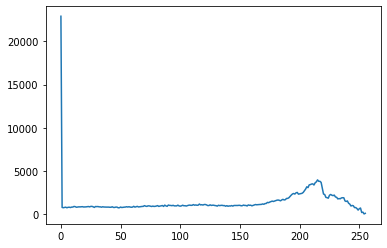

In [24]:
plt.plot(histr)

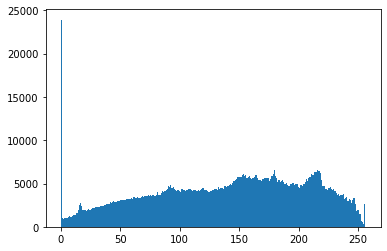

In [25]:
# alternative way to find histogram of an image
plt.hist(image.ravel(),256,[0,256])
plt.show()

## Greyscale Histogram

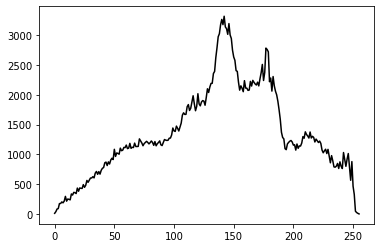

In [26]:
grey_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
histogram = cv2.calcHist([grey_image], [0], None, [256], [0, 256])
plt.plot(histogram, color='k')

## Colour Histogram

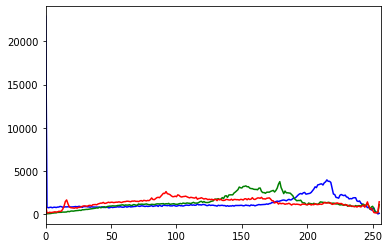

In [27]:
for i, col in enumerate(['b', 'g', 'r']):
    hist = cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hist, color = col)
    plt.xlim([0, 256])
    
plt.show()
